
# 小地域の収入推定

```Data```フォルダには、小地域の収入データ(```income_district.csv```)と国勢調査の小地域集計データが格納されています。

国勢調査の小地域集計データ（人口構成、労働力構成、住宅形態など）から、その地域の収入を推定することが考えられます。推定のための機械学習・深層学習モデルを構築しなさい。


- データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい
- データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい
- モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい


In [1]:
#各小地域集計データを見ると、各地域にdistrict_idとdistrict2_idが付与されている。これに対し、今回の正解ラベルであるincome_district_idではincome_district2_idがない。
#つまり、2_idではなく_id単位ごとで集計する必要がある。ここで、小地域の各データには、地域ごとのデータをまとめた行（2_idの欠損した行）がある。これを活用する。

#また、各データにおける欠損値の確認とある場合の置き換えも必要である。

#それらの対処をしたうえで、すべてのデータファイルの列を独立変数としてそれぞれ単回帰させ、平均2乗誤差と決定係数を予測精度としてを出す。
#その結果から、どの分野データが予測に適しているかを見る

In [2]:
#インポートを済ませる
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

In [3]:
#データの読み込み
df_age=pd.read_csv("Data\h27_age_df.csv")
df_family=pd.read_csv("Data\h27_family_df.csv")
df_gender=pd.read_csv("Data\h27_gender_df2.csv")
df_house=pd.read_csv("Data\h27_house_df.csv")
df_house_info=pd.read_csv("Data\h27_house_info_df.csv")
df_industry=pd.read_csv("Data\h27_indusry_df.csv")
df_job=pd.read_csv("Data\h27_job_df.csv")
df_labor=pd.read_csv("Data\h27_labor_df.csv")
df_marriage=pd.read_csv("Data\h27_marriage_df.csv")
df_work_status=pd.read_csv("Data\h27_work_status_df.csv")
df_income_district=pd.read_csv("Data\income_district.csv")

In [4]:
#小地域の合計値の行だけ抽出する=district2_idの列が欠損している行だけを抽出
#しかし、抽出後のデータの行数が小地域各データとincome_districtで一致しない（それぞれ約1800と約1200）しかし、あとで合成したいので一致させる必要がある
#よって、正解データがないものを削除する（＝income_districtのarea_codeにないdistrict_idを削除する）

#前準備として、income_districtの列名area_codeをdistrict_idに変更
df_income_district.rename(columns={'area_code':'district_id'},inplace=True)

#age
#小地域の合計値の行だけ抽出する
df_age_2=df_age[df_age['district2_id'].isna()]
#正解データがない行を削除
df_age_2=df_age_2[df_age_2['district_id'].isin(df_income_district['district_id'])]
#csvとして保存
df_age_2.to_csv('h27_age_2.csv',index=False)

#familiy
#小地域の合計値の行だけ抽出する
df_familiy_2=df_family[df_family['district2_id'].isna()]
#正解データがない行を削除
df_familiy_2=df_familiy_2[df_familiy_2['district_id'].isin(df_income_district['district_id'])]
#csvとして保存
df_familiy_2.to_csv('h27_familiy_2.csv',index=False)

#gender
#小地域の合計値の行だけ抽出する
df_gender_2=df_gender[df_gender['district2_id'].isna()]
#正解データがない行を削除
df_gender_2=df_gender_2[df_gender_2['district_id'].isin(df_income_district['district_id'])]
#csvとして保存
df_gender_2.to_csv('h27_gender_2.csv',index=False)

#house
#小地域の合計値の行だけ抽出する
df_house_2=df_house[df_house['district2_id'].isna()]
#正解データがない行を削除
df_house_2=df_house_2[df_house_2['district_id'].isin(df_income_district['district_id'])]
#csvとして保存
df_house_2.to_csv('h27_house_2.csv',index=False)

#house_info
#小地域の合計値の行だけ抽出する
df_house_info_2=df_house_info[df_house_info['district2_id'].isna()]
#正解データがない行を削除
df_house_info_2=df_house_info_2[df_house_info_2['district_id'].isin(df_income_district['district_id'])]
#csvとして保存
df_house_info_2.to_csv('h27_house_info_2.csv',index=False)

#industry
#小地域の合計値の行だけ抽出する
df_industry_2=df_industry[df_industry['district2_id'].isna()]
#正解データがない行を削除
df_industry_2=df_industry_2[df_industry_2['district_id'].isin(df_income_district['district_id'])]
#csvとして保存
df_industry_2.to_csv('h27_industry_2.csv',index=False)

#job
#小地域の合計値の行だけ抽出する
df_job_2=df_job[df_job['district2_id'].isna()]
#正解データがない行を削除
df_job_2=df_job_2[df_job_2['district_id'].isin(df_income_district['district_id'])]
#csvとして保存
df_job_2.to_csv('h27_job_2.csv',index=False)

#labor
#小地域の合計値の行だけ抽出する
df_labor_2=df_labor[df_labor['district2_id'].isna()]
#正解データがない行を削除
df_labor_2=df_labor_2[df_labor_2['district_id'].isin(df_income_district['district_id'])]
#csvとして保存
df_labor_2.to_csv('h27_labor_2.csv',index=False)

#marriage
#小地域の合計値の行だけ抽出する
df_marriage_2=df_marriage[df_marriage['district2_id'].isna()]
#正解データがない行を削除
df_marriage_2=df_marriage_2[df_marriage_2['district_id'].isin(df_income_district['district_id'])]
#csvとして保存
df_marriage_2.to_csv('h27_marriage_2.csv',index=False)

#work_status
#小地域の合計値の行だけ抽出する
df_work_status_2=df_work_status[df_work_status['district2_id'].isna()]
#正解データがない行を削除
df_work_status_2=df_work_status_2[df_work_status_2['district_id'].isin(df_income_district['district_id'])]
#csvとして保存
df_work_status_2.to_csv('h27_work_status_2.csv',index=False)

In [5]:
#income_districtにあるデータのうち、７つは小地域の各データにないものがあるので、これを削除し、データ数を一致させる(小地域の各データ数は一致している)
df_income_district_2=df_income_district[df_income_district['district_id'].isin(df_age_2['district_id'])]
#csvとして保存
df_income_district_2.to_csv('income_district_2.csv',index=False)

In [6]:
#欠損値の確認、各列の欠損値の数を表示
#income_district
print("欠損値の確認:")
print(df_income_district_2.isnull().sum()) 

#age
print("欠損値の確認:")
print(df_age_2.isnull().sum())

#familiy
print("欠損値の確認:")
print(df_familiy_2.isnull().sum()) 

#gender
print("欠損値の確認:")
print(df_gender_2.isnull().sum()) 

#house
print("欠損値の確認:")
print(df_house_2.isnull().sum()) 

#house_info
print("欠損値の確認:")
print(df_house_info_2.isnull().sum()) 

#industry
print("欠損値の確認:")
print(df_industry_2.isnull().sum()) 

#job
print("欠損値の確認:")
print(df_job_2.isnull().sum()) 

#labor
print("欠損値の確認:")
print(df_labor_2.isnull().sum()) 

#marriage
print("欠損値の確認:")
print(df_marriage_2.isnull().sum()) 

#work_status
print("欠損値の確認:")
print(df_work_status_2.isnull().sum()) 


欠損値の確認:
district_id    0
income_mean    0
dtype: int64
欠損値の確認:
district_id            0
district2_id        1238
level_identifier       0
state_name             0
city_name              0
                    ... 
80-84_female           0
85-89_female           0
90-94_female           0
95-99_female           0
100_female             0
Length: 68, dtype: int64
欠損値の確認:
district_id                0
district2_id            1238
level_identifier           0
state_name                 0
city_name                  0
district_name           1238
district2_name          1238
family_count               0
family_member_count        0
general_family_count       0
member_1                   0
member_2                   0
member_3                   0
member_4                   0
member_5                   0
member_6                   0
member_7                   0
dtype: int64
欠損値の確認:
district_id             0
district2_id         1238
level_identifier        0
state_name              0
city_name  

In [7]:
#結果として、_2に成形したデータフォルダのうち、各小地域データのdistrict2_idを除くと、ageデータの「100_female」でのみ欠損値(-)が見られた
#そこで、-をNaNに置き換えたうえで中央値を入れて置き換えることとする
#-をNaN に置き換える
df_age_2.iloc[:,-1].replace('-',np.nan,inplace=True) 
#列を数値型へ
df_age_2.iloc[:,-1]=pd.to_numeric(df_age_2.iloc[:, -1],errors='coerce')
#NaNを中央値で置き換え
median_value=df_age_2.iloc[:,-1].median()
df_age_2.iloc[:,-1].fillna(median_value,inplace=True)

C:\Users\tanis\AppData\Local\Temp\ipykernel_29896\3616662552.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_age_2.iloc[:,-1].replace('-',np.nan,inplace=True)
C:\Users\tanis\AppData\Local\Temp\ipykernel_29896\3616662552.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [8]:
#ここからは、各データフォルダ内の変数で単回帰分析を行い、各モデルでの適合度を見る

#線形回帰モデルの導入とモデルの予測精度を評価する関数の導入
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#小数表記になるように
pd.set_option('display.float_format', '{:.10f}'.format)

#結果の保存先(全ての変数・データで共通の格納先)
results_mse=[]
results_r2=[]

#age
#income_disrtictから平均収入のデータを合体
df_merged_age=pd.merge(df_age_2,df_income_district,on="district_id")
df_merged_age.to_csv('merged_age.csv',index=False)

#列数を入手
howmany_columns=list(range(df_merged_age.shape[1]-7))
#各列の変数で線形回帰を実行
for i in howmany_columns:  
    X=df_merged_age.iloc[:,i+7:i+8] #各変数は共通して8列目から
    Y=df_merged_age.iloc[:,-1]#平均年収は列の中で最後
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
    #学習用と評価用にデータ分けたことで生じたNaNを、中央値で置き換え
    all_data=pd.concat([X_train, X_test])
    #数値型に
    all_data=all_data.apply(pd.to_numeric, errors='coerce')
    all_data.fillna(all_data.median(), inplace=True)
    X_train=all_data.loc[X_train.index]
    X_test=all_data.loc[X_test.index]
    model=LinearRegression()#線形回帰モデル
    model.fit(X_train,Y_train)#モデルを訓練データへ
    Y_predicted_i=model.predict(X_test)#テストデータで予測
    mse=mean_squared_error(Y_test,Y_predicted_i)#予測精度（平均二乗誤差）の評価
    r2=r2_score(Y_test, Y_predicted_i)#予測精度（決定係数）の評価
    results_mse.append({'Feature Index': i+7,'Feature Name': df_merged_age.columns[i+7], 'Mean Squared Error':mse}) #結果を格納
    results_r2.append({'Feature Index': i+7,'Feature Name': df_merged_age.columns[i+7], 'r2_score':r2}) #結果を格納

In [9]:
#familiy
#income_disrtictから平均収入のデータを合体
df_merged_familiy=pd.merge(df_familiy_2,df_income_district,on="district_id")
df_merged_familiy.to_csv('merged_familiy.csv',index=False)

#列数を入手
howmany_columns=list(range(df_merged_familiy.shape[1]-7))
#各列の変数で線形回帰を実行
for i in howmany_columns:  
    X=df_merged_familiy.iloc[:,i+7:i+8] #各変数は共通して8列目から
    Y=df_merged_familiy.iloc[:,-1]#平均年収は列の中で最後
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
    #学習用と評価用にデータ分けたことで生じたNaNを、中央値で置き換え
    all_data=pd.concat([X_train, X_test])
    #数値型に
    all_data=all_data.apply(pd.to_numeric, errors='coerce')
    all_data.fillna(all_data.median(), inplace=True)
    X_train=all_data.loc[X_train.index]
    X_test=all_data.loc[X_test.index]
    model=LinearRegression()#線形回帰モデル
    model.fit(X_train,Y_train)#モデルを訓練データへ
    Y_predicted_i=model.predict(X_test)#テストデータで予測
    mse=mean_squared_error(Y_test,Y_predicted_i)#予測精度（平均二乗誤差）の評価
    r2=r2_score(Y_test, Y_predicted_i)#予測精度（決定係数）の評価
    results_mse.append({'Feature Index': i+7,'Feature Name': df_merged_familiy.columns[i+7], 'Mean Squared Error':mse}) #結果を格納
    results_r2.append({'Feature Index': i+7,'Feature Name': df_merged_familiy.columns[i+7], 'r2_score':r2}) #結果を格納

In [10]:
#gender
#income_disrtictから平均収入のデータを合体
df_merged_gender=pd.merge(df_gender_2,df_income_district,on="district_id")
df_merged_gender.to_csv('merged_familiy.csv',index=False)

#列数を入手
howmany_columns=list(range(df_merged_gender.shape[1]-7))
#各列の変数で線形回帰を実行
for i in howmany_columns:  
    X=df_merged_gender.iloc[:,i+7:i+8] #各変数は共通して8列目から
    Y=df_merged_gender.iloc[:,-1]#平均年収は列の中で最後
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
    #学習用と評価用にデータ分けたことで生じたNaNを、中央値で置き換え
    all_data=pd.concat([X_train, X_test])
    #数値型に
    all_data=all_data.apply(pd.to_numeric, errors='coerce')
    all_data.fillna(all_data.median(), inplace=True)
    X_train=all_data.loc[X_train.index]
    X_test=all_data.loc[X_test.index]
    model=LinearRegression()#線形回帰モデル
    model.fit(X_train,Y_train)#モデルを訓練データへ
    Y_predicted_i=model.predict(X_test)#テストデータで予測
    mse=mean_squared_error(Y_test,Y_predicted_i)#予測精度（平均二乗誤差）の評価
    r2=r2_score(Y_test, Y_predicted_i)#予測精度（決定係数）の評価
    results_r2.append({'Feature Index': i+7,'Feature Name': df_merged_gender.columns[i+7], 'r2_score':r2}) #結果を格納
    results_mse.append({'Feature Index': i+7,'Feature Name': df_merged_gender.columns[i+7], 'Mean Squared Error':mse}) #結果を格納
    

In [11]:
#house
#income_disrtictから平均収入のデータを合体
df_merged_house=pd.merge(df_house_2,df_income_district,on="district_id")
df_merged_house.to_csv('merged_house.csv',index=False)

#列数を入手
howmany_columns=list(range(df_merged_house.shape[1]-7))
#各列の変数で線形回帰を実行
for i in howmany_columns:  
    X=df_merged_house.iloc[:,i+7:i+8] #各変数は共通して8列目から
    Y=df_merged_house.iloc[:,-1]#平均年収は列の中で最後
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
    #学習用と評価用にデータ分けたことで生じたNaNを、中央値で置き換え
    all_data=pd.concat([X_train, X_test])
    #数値型に
    all_data=all_data.apply(pd.to_numeric, errors='coerce')
    all_data.fillna(all_data.median(), inplace=True)
    X_train=all_data.loc[X_train.index]
    X_test=all_data.loc[X_test.index]
    model=LinearRegression()#線形回帰モデル
    model.fit(X_train,Y_train)#モデルを訓練データへ
    Y_predicted_i=model.predict(X_test)#テストデータで予測
    mse=mean_squared_error(Y_test,Y_predicted_i)#予測精度（平均二乗誤差）の評価
    r2=r2_score(Y_test, Y_predicted_i)#予測精度（決定係数）の評価
    results_r2.append({'Feature Index': i+7,'Feature Name': df_merged_house.columns[i+7], 'r2_score':r2}) #結果を格納
    results_mse.append({'Feature Index': i+7,'Feature Name': df_merged_house.columns[i+7], 'Mean Squared Error':mse}) #結果を格納

In [12]:
#house_info
#income_disrtictから平均収入のデータを合体
df_merged_house_info=pd.merge(df_house_info_2,df_income_district,on="district_id")
df_merged_house_info.to_csv('merged_house_info.csv',index=False)

#列数を入手
howmany_columns=list(range(df_merged_house_info.shape[1]-7))
#各列の変数で線形回帰を実行
for i in howmany_columns:  
    X=df_merged_house_info.iloc[:,i+7:i+8] #各変数は共通して8列目から
    Y=df_merged_house_info.iloc[:,-1]#平均年収は列の中で最後
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
    #学習用と評価用にデータ分けたことで生じたNaNを、中央値で置き換え
    all_data=pd.concat([X_train, X_test])
    #数値型に
    all_data=all_data.apply(pd.to_numeric, errors='coerce')
    all_data.fillna(all_data.median(), inplace=True)
    X_train=all_data.loc[X_train.index]
    X_test=all_data.loc[X_test.index]
    model=LinearRegression()#線形回帰モデル
    model.fit(X_train,Y_train)#モデルを訓練データへ
    Y_predicted_i=model.predict(X_test)#テストデータで予測
    mse=mean_squared_error(Y_test,Y_predicted_i)#予測精度（平均二乗誤差）の評価
    r2=r2_score(Y_test, Y_predicted_i)#予測精度（決定係数）の評価
    results_r2.append({'Feature Index': i+7,'Feature Name': df_merged_house_info.columns[i+7], 'r2_score':r2}) #結果を格納
    results_mse.append({'Feature Index': i+7,'Feature Name': df_merged_house_info.columns[i+7], 'Mean Squared Error':mse}) #結果を格納

In [13]:
#industry
#income_disrtictから平均収入のデータを合体
df_merged_industry=pd.merge(df_industry_2,df_income_district,on="district_id")
df_merged_industry.to_csv('merged_industry.csv',index=False)

#列数を入手
howmany_columns=list(range(df_merged_industry.shape[1]-7))
#各列の変数で線形回帰を実行
for i in howmany_columns:  
    X=df_merged_industry.iloc[:,i+7:i+8] #各変数は共通して8列目から
    Y=df_merged_industry.iloc[:,-1]#平均年収は列の中で最後
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
    #学習用と評価用にデータ分けたことで生じたNaNを、中央値で置き換え
    all_data=pd.concat([X_train, X_test])
    #数値型に
    all_data=all_data.apply(pd.to_numeric, errors='coerce')
    all_data.fillna(all_data.median(), inplace=True)
    X_train=all_data.loc[X_train.index]
    X_test=all_data.loc[X_test.index]
    model=LinearRegression()#線形回帰モデル
    model.fit(X_train,Y_train)#モデルを訓練データへ
    Y_predicted_i=model.predict(X_test)#テストデータで予測
    mse=mean_squared_error(Y_test,Y_predicted_i)#予測精度（平均二乗誤差）の評価
    r2=r2_score(Y_test, Y_predicted_i)#予測精度（決定係数）の評価
    results_r2.append({'Feature Index': i+7,'Feature Name': df_merged_industry.columns[i+7], 'r2_score':r2}) #結果を格納
    results_mse.append({'Feature Index': i+7,'Feature Name': df_merged_industry.columns[i+7], 'Mean Squared Error':mse}) #結果を格納

In [14]:
#job
#income_disrtictから平均収入のデータを合体
df_merged_job=pd.merge(df_job_2,df_income_district,on="district_id")
df_merged_job.to_csv('merged_job.csv',index=False)

#列数を入手
howmany_columns=list(range(df_merged_job.shape[1]-7))
#各列の変数で線形回帰を実行
for i in howmany_columns:  
    X=df_merged_job.iloc[:,i+7:i+8] #各変数は共通して8列目から
    Y=df_merged_job.iloc[:,-1]#平均年収は列の中で最後
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
    #学習用と評価用にデータ分けたことで生じたNaNを、中央値で置き換え
    all_data=pd.concat([X_train, X_test])
    #数値型に
    all_data=all_data.apply(pd.to_numeric, errors='coerce')
    all_data.fillna(all_data.median(), inplace=True)
    X_train=all_data.loc[X_train.index]
    X_test=all_data.loc[X_test.index]
    model=LinearRegression()#線形回帰モデル
    model.fit(X_train,Y_train)#モデルを訓練データへ
    Y_predicted_i=model.predict(X_test)#テストデータで予測
    mse=mean_squared_error(Y_test,Y_predicted_i)#予測精度（平均二乗誤差）の評価
    r2=r2_score(Y_test, Y_predicted_i)#予測精度（決定係数）の評価
    results_r2.append({'Feature Index': i+7,'Feature Name': df_merged_job.columns[i+7], 'r2_score':r2}) #結果を格納
    results_mse.append({'Feature Index': i+7,'Feature Name': df_merged_job.columns[i+7], 'Mean Squared Error':mse}) #結果を格納

In [15]:
#labor
#income_disrtictから平均収入のデータを合体
df_merged_labor=pd.merge(df_labor_2,df_income_district,on="district_id")
df_merged_labor.to_csv('merged_labor.csv',index=False)

#列数を入手
howmany_columns=list(range(df_merged_labor.shape[1]-7))
#各列の変数で線形回帰を実行
for i in howmany_columns:  
    X=df_merged_labor.iloc[:,i+7:i+8] #各変数は共通して8列目から
    Y=df_merged_labor.iloc[:,-1]#平均年収は列の中で最後
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
    #学習用と評価用にデータ分けたことで生じたNaNを、中央値で置き換え
    all_data=pd.concat([X_train, X_test])
    #数値型に
    all_data=all_data.apply(pd.to_numeric, errors='coerce')
    all_data.fillna(all_data.median(), inplace=True)
    X_train=all_data.loc[X_train.index]
    X_test=all_data.loc[X_test.index]
    model=LinearRegression()#線形回帰モデル
    model.fit(X_train,Y_train)#モデルを訓練データへ
    Y_predicted_i=model.predict(X_test)#テストデータで予測
    mse=mean_squared_error(Y_test,Y_predicted_i)#予測精度（平均二乗誤差）の評価
    r2=r2_score(Y_test, Y_predicted_i)#予測精度（決定係数）の評価
    results_r2.append({'Feature Index': i+7,'Feature Name': df_merged_labor.columns[i+7], 'r2_score':r2}) #結果を格納
    results_mse.append({'Feature Index': i+7,'Feature Name': df_merged_labor.columns[i+7], 'Mean Squared Error':mse}) #結果を格納

In [16]:
#marriage
#income_disrtictから平均収入のデータを合体
df_merged_marriage=pd.merge(df_marriage_2,df_income_district,on="district_id")
df_merged_marriage.to_csv('merged_marriage.csv',index=False)

#列数を入手
howmany_columns=list(range(df_merged_marriage.shape[1]-7))
#各列の変数で線形回帰を実行
for i in howmany_columns:  
    X=df_merged_marriage.iloc[:,i+7:i+8] #各変数は共通して8列目から
    Y=df_merged_marriage.iloc[:,-1]#平均年収は列の中で最後
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
    #学習用と評価用にデータ分けたことで生じたNaNを、中央値で置き換え
    all_data=pd.concat([X_train, X_test])
    #数値型に
    all_data=all_data.apply(pd.to_numeric, errors='coerce')
    all_data.fillna(all_data.median(), inplace=True)
    X_train=all_data.loc[X_train.index]
    X_test=all_data.loc[X_test.index]
    model=LinearRegression()#線形回帰モデル
    model.fit(X_train,Y_train)#モデルを訓練データへ
    Y_predicted_i=model.predict(X_test)#テストデータで予測
    mse=mean_squared_error(Y_test,Y_predicted_i)#予測精度（平均二乗誤差）の評価
    r2=r2_score(Y_test, Y_predicted_i)#予測精度（決定係数）の評価
    results_r2.append({'Feature Index': i+7,'Feature Name': df_merged_marriage.columns[i+7], 'r2_score':r2}) #結果を格納
    results_mse.append({'Feature Index': i+7,'Feature Name': df_merged_marriage.columns[i+7], 'Mean Squared Error':mse}) #結果を格納

In [17]:
#work_status
#income_disrtictから平均収入のデータを合体
df_merged_work_status=pd.merge(df_work_status_2,df_income_district,on="district_id")
df_merged_work_status.to_csv('merged_work_status.csv',index=False)

#列数を入手
howmany_columns=list(range(df_merged_work_status.shape[1]-7))
#各列の変数で線形回帰を実行
for i in howmany_columns:  
    X=df_merged_work_status.iloc[:,i+7:i+8] #各変数は共通して8列目から
    Y=df_merged_work_status.iloc[:,-1]#平均年収は列の中で最後
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
    #学習用と評価用にデータ分けたことで生じたNaNを、中央値で置き換え
    all_data=pd.concat([X_train, X_test])
    #数値型に
    all_data=all_data.apply(pd.to_numeric, errors='coerce')
    all_data.fillna(all_data.median(), inplace=True)
    X_train=all_data.loc[X_train.index]
    X_test=all_data.loc[X_test.index]
    model=LinearRegression()#線形回帰モデル
    model.fit(X_train,Y_train)#モデルを訓練データへ
    Y_predicted_i=model.predict(X_test)#テストデータで予測
    mse=mean_squared_error(Y_test,Y_predicted_i)#予測精度（平均二乗誤差）の評価
    r2=r2_score(Y_test, Y_predicted_i)#予測精度（決定係数）の評価
    results_r2.append({'Feature Index': i+7,'Feature Name': df_merged_work_status.columns[i+7], 'r2_score':r2}) #結果を格納
    results_mse.append({'Feature Index': i+7,'Feature Name': df_merged_work_status.columns[i+7], 'Mean Squared Error':mse}) #結果を格納


In [18]:
#２つのresultsの結果についてmseは昇順に、決定係数は降順に並べることで、どの変数の予測精度が高いかを見る

#小数表記になるように
pd.set_option('display.float_format', '{:.10f}'.format)

#平均2乗誤差
sorted_results_mse=sorted(results_mse,key=lambda x: x['Mean Squared Error'])
sorted_results_mse=pd.DataFrame(sorted_results_mse)
sorted_results_mse.to_csv('sorted_results_mse.csv',index=False)

#結果として、小さい上位10変数は上から順に以下の通りに
#B_professional_workers_male,3279.7497184521203 job
#C_office_workers_male,3321.0251787642287 job
#E_manufacturing_male,3394.6784030606905 industry
#share_house_individual,3406.278333377843 house_info
#share_house_family,3432.1089608170587 house_info
#A_administrative_male,3460.8821915507865 job
#6-10floor_individual,3468.053411400885 house_info
#member_4,3470.0176997684252 family
#D_sales_workers_male,3482.8913441418404 job
#G_information_male,3495.1103437601537 industry

#決定係数
sorted_results_r2=sorted(results_r2,key=lambda x: x['r2_score'], reverse=True)
sorted_results_r2=pd.DataFrame(sorted_results_r2)
sorted_results_r2.to_csv('sorted_results_r2.csv',index=False)

#結果として、大きい上位10変数は上から順に以下の通りに
#8,B_professional_workers_male,0.14775672274245588　job
#12,E_manufacturing_male,0.14273994976072968 industry
#9,C_office_workers_male,0.13703129044230256 job
#14,G_information_male,0.11737781517619184 industry
#19,L_academic_male,0.11314062810798786 industry
#16,share_house_individual,0.10982094835647505 house_info
#9,share_house_family,0.10307050661720696 house_info
#7,A_administrative_male,0.10068943232609273 industry
#35,45-49_male,0.10029736437412329 age
#34,40-44_male,0.09614343281274806 age

#ここからは、mseと決定係数それぞれについて図示を行う

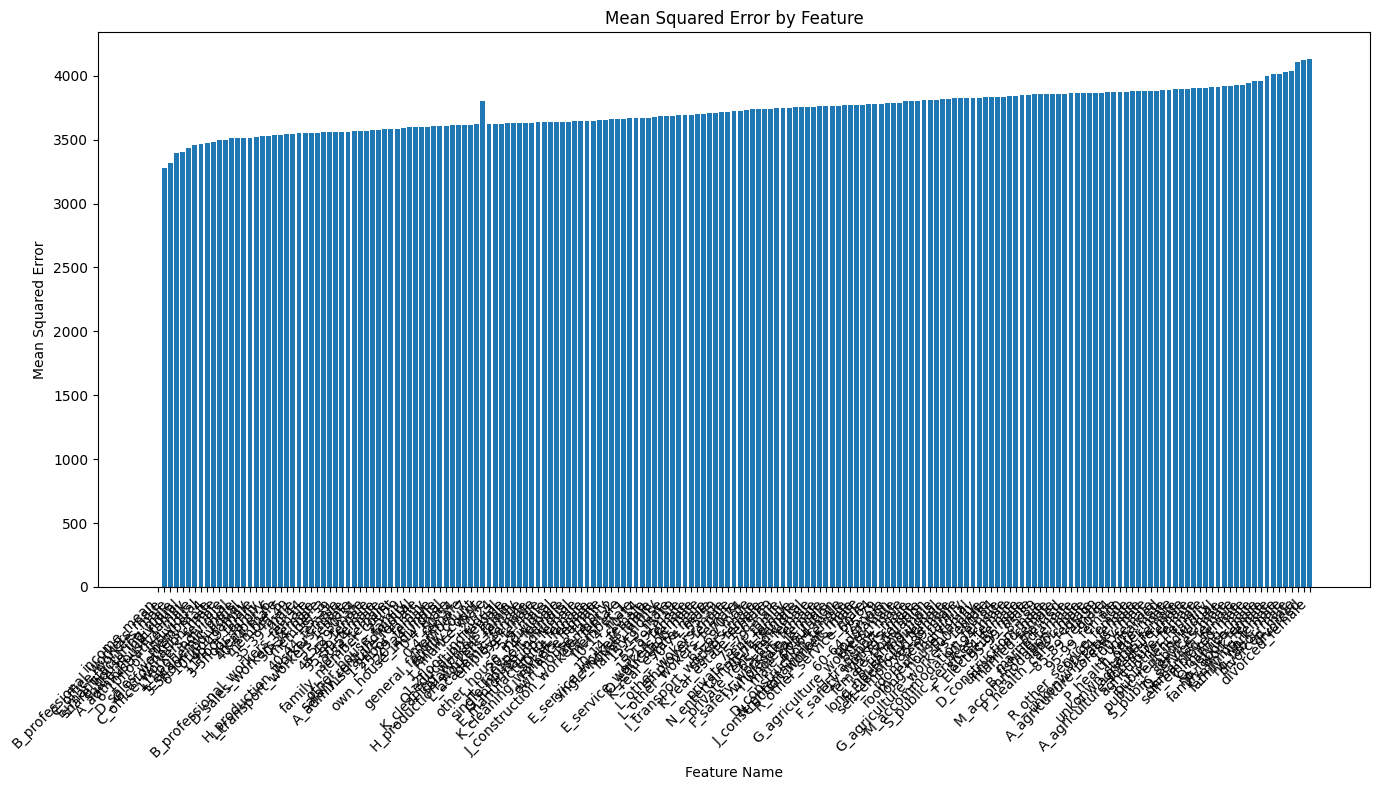

In [20]:
#mse
#すべての変数について、その平均2乗誤差の大きさを図示する
feature_names=sorted_results_mse['Feature Name']
mse_values=sorted_results_mse['Mean Squared Error']
plt.figure(figsize=(14,8))
plt.bar(feature_names, mse_values)
plt.xlabel('Feature Name')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error by Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

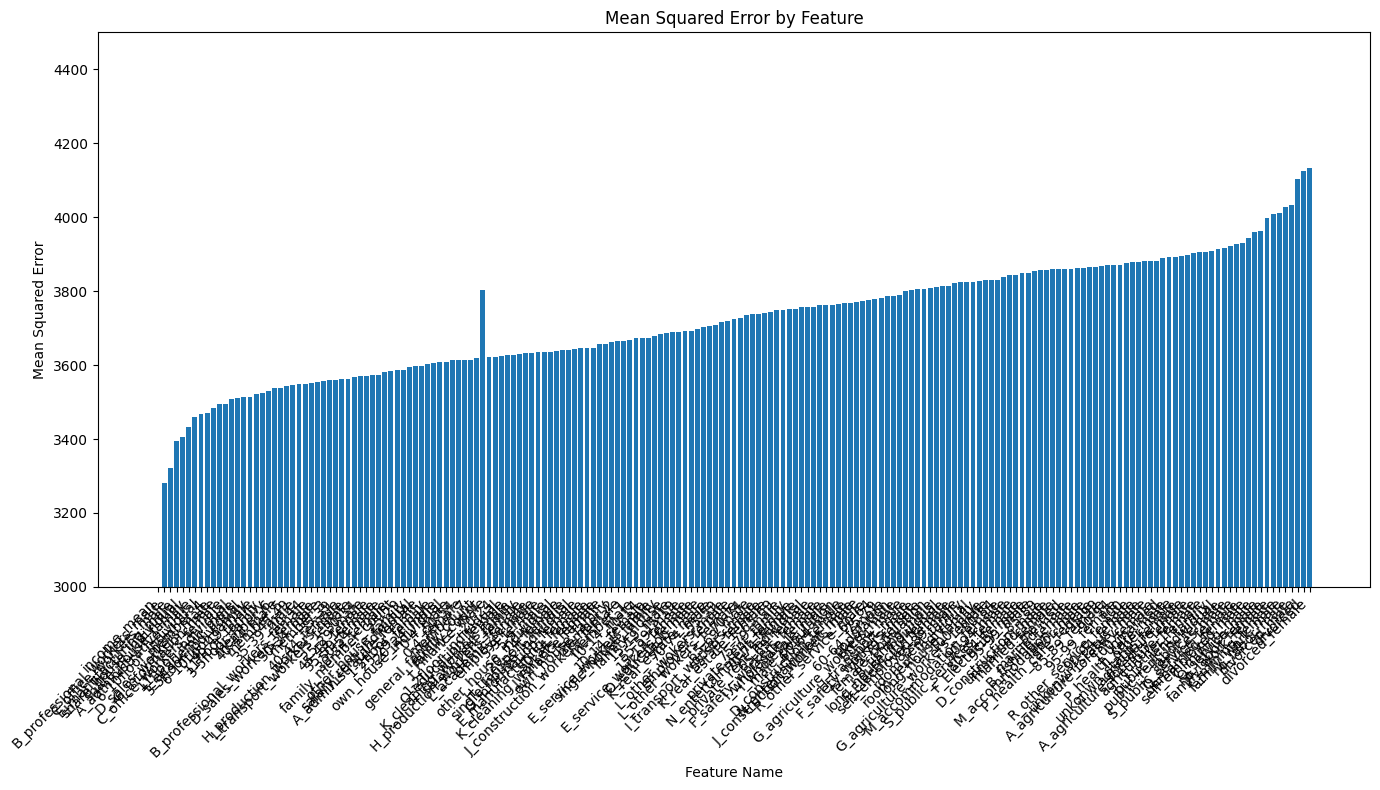

In [21]:
#3000～4000の間に収まっていることが分かる。そして、現段階だと差が分かりづらいので、y軸の表示範囲を限定する
feature_names=sorted_results_mse['Feature Name']
mse_values=sorted_results_mse['Mean Squared Error']
plt.figure(figsize=(14,8))
plt.bar(feature_names, mse_values)
plt.xlabel('Feature Name')
plt.ylabel('Mean Squared Error')
plt.ylim(3000, 4500)  #y軸の上限を設定
plt.title('Mean Squared Error by Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

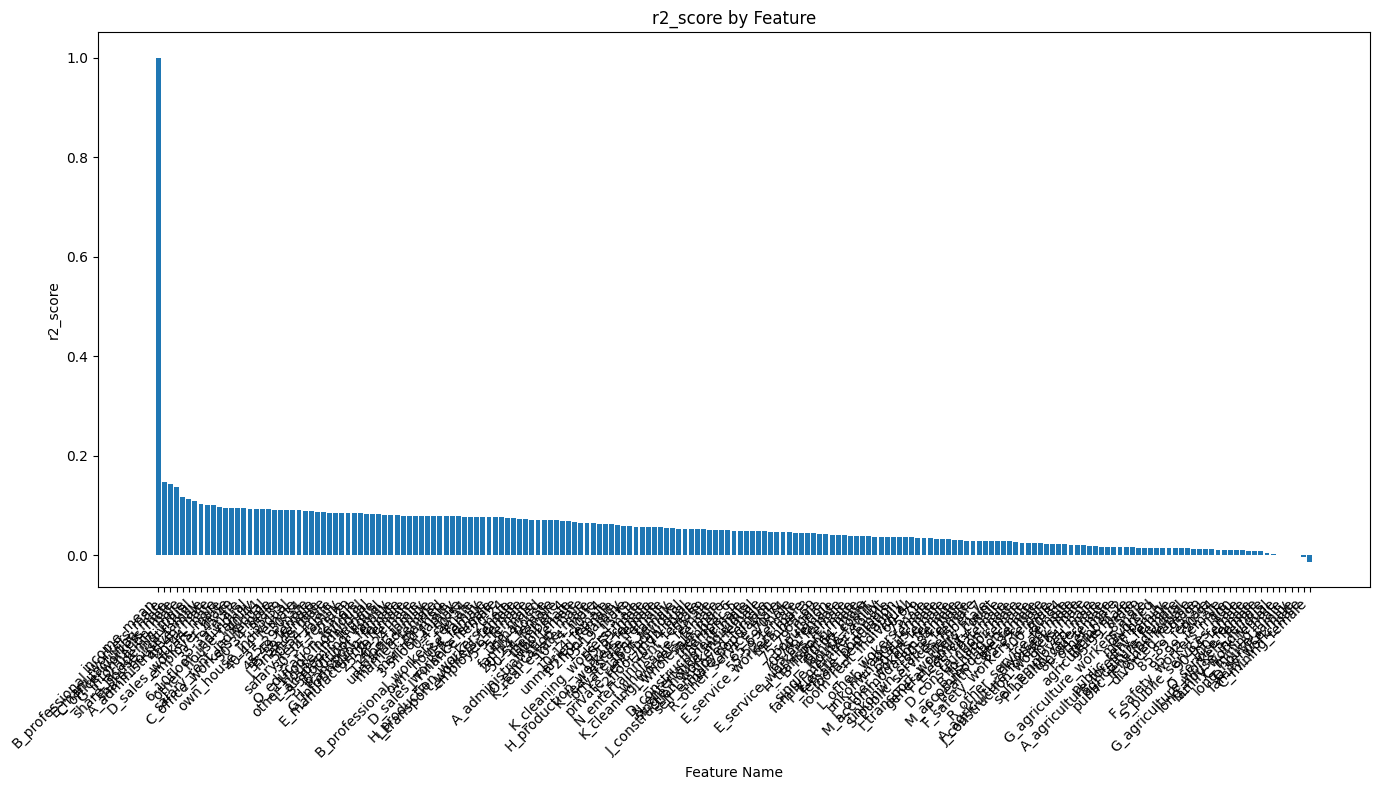

In [22]:
#決定係数
#すべての変数について、その決定係数の大きさを図示する
feature_names=sorted_results_r2['Feature Name']
r2_score_values=sorted_results_r2['r2_score']
plt.figure(figsize=(14,8))
plt.bar(feature_names, r2_score_values)
plt.xlabel('Feature Name')
plt.ylabel('r2_score')
plt.title('r2_score by Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#平均年収自体が入ってしまっているので、1.0になっている

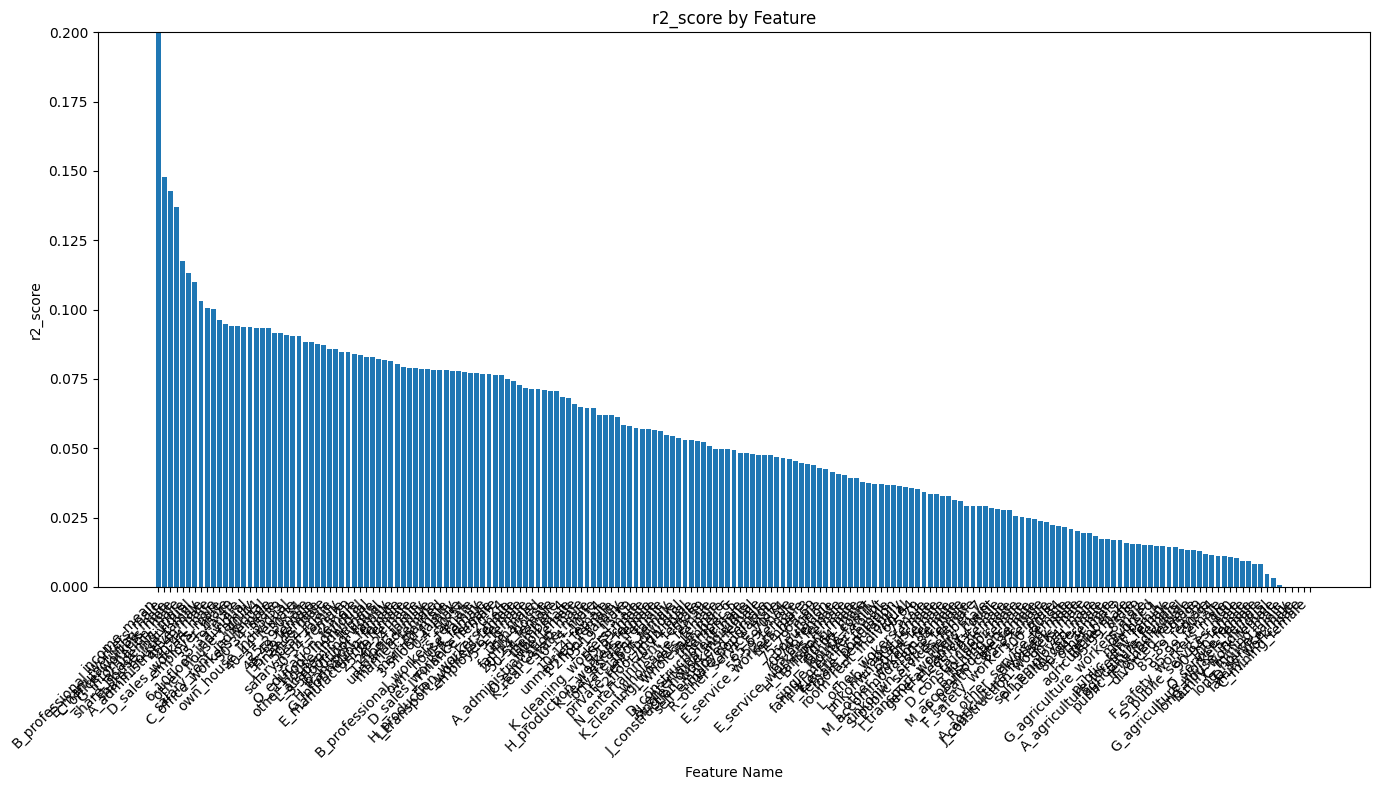

In [23]:
#先程と同じく、現段階だと差が分かりづらいので、y軸の表示範囲を限定する
feature_names=sorted_results_r2['Feature Name']
r2_score_values=sorted_results_r2['r2_score']
plt.figure(figsize=(14,8))
plt.bar(feature_names, r2_score_values)
plt.xlabel('Feature Name')
plt.ylabel('r2_score')
plt.ylim(0, 0.20)  #y軸の上限を設定
plt.title('r2_score by Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
#次にどの分野の人口データが有効かを考える
#mse
#「男性の職業」や「男性の職種」また「居住形態」や「世帯人数」が上位10変数に含まれている
#特に「男性の職種」(job)が最多の4つを占めている。（女性と比べても、男性の方が軒並み小さかった）
#決定係数 「男性の職業」や「男性の職種」また「居住形態」はmseと同じく、「人口」が含まれている
#特に「男性の職業」(industry)が最多の4つを占めている。「男性の職種」(job)は2つ

#このことから、「男性の職業」と「男性の職種」に着目する
#2つのデータについて、すべての変数を用いて重回帰分析を行う。そのmseと調整済み決定係数を比較する。

#job
X=df_merged_job.iloc[:,7:27] 
Y=df_merged_job.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
all_data=pd.concat([X_train, X_test])
all_data=all_data.apply(pd.to_numeric, errors='coerce')
all_data.fillna(all_data.median(), inplace=True)
X_train=all_data.loc[X_train.index]
X_test=all_data.loc[X_test.index]
model=LinearRegression()#線形回帰モデル
model.fit(X_train,Y_train)#モデルを訓練データへ
Y_predicted=model.predict(X_test)#テストデータで予測
mse=mean_squared_error(Y_test,Y_predicted)#予測精度（平均二乗誤差）の評価
#予測精度（調整済み決定係数）の評価
n=len(Y_test)#サンプル数
k=X_train.shape[1]#説明変数の数
r2=r2_score(Y_test,Y_predicted)#決定係数
adjusted_r2=1-(1-r2)*(n-1)/(n-k-1)#調整済み決定係数
print(f'平均二乗誤差: {mse}, 決定係数: {adjusted_r2}')

#平均2乗誤差は約2180と1000近く減少する(変数一つだけの場合と比べ、最小でも約30％の減少)
#調整済み決定係数は0.40と分散の約40％を説明している（変数1つの場合比べ、%は約30の増加）

#industy
X=df_merged_industry.iloc[:,7:18] 
Y=df_merged_industry.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1) 
all_data=pd.concat([X_train, X_test])
all_data=all_data.apply(pd.to_numeric, errors='coerce')
all_data.fillna(all_data.median(), inplace=True)
X_train=all_data.loc[X_train.index]
X_test=all_data.loc[X_test.index]
model=LinearRegression()#線形回帰モデル
model.fit(X_train,Y_train)#モデルを訓練データへ
Y_predicted=model.predict(X_test)#テストデータで予測
mse=mean_squared_error(Y_test,Y_predicted)#予測精度（平均二乗誤差）の評価
#予測精度（調整済み決定係数）の評価
n=len(Y_test)#サンプル数
k=X_train.shape[1]#説明変数の数
r2=r2_score(Y_test,Y_predicted)#決定係数
adjusted_r2=1-(1-r2)*(n-1)/(n-k-1)#調整済み決定係数
print(f'平均二乗誤差: {mse}, 決定係数: {adjusted_r2}')

#平均2乗誤差は約2580、調整済み決定係数は0.33と、どちらもjobと比較して予測精度は低い結果となった
#また、女性のデータをそれぞれ含めた場合は以下の結果となる
#job 平均二乗誤差: 2194.8781932064685, 決定係数: 0.3919658527678037
#industry 平均二乗誤差: 2581.013043317449, 決定係数: 0.267236013080725
#どちらも予測精度が低下することが読み取れる

#これらの結果を総合すると、男性職業データが平均年収の予測に適していると言えそうである


平均二乗誤差: 2183.5404909481913, 決定係数: 0.40027669795218324
平均二乗誤差: 2585.0781255649904, 決定係数: 0.32724175411137524
